# PH Covid-19 Cases

## Introduction

Philippines, like most of the world, is currently fighting its own corona virus outbreak. Since the first local transmission has been recorded, the Philippine Government sought relief by issuing a declaration of Code Red Sub-level 2, Enhanced Community Quarantine which covers all of Luzon and starting a mass testing initiative.

The result of these tests were then released as pdfs containing confirmed filipino Covid-19 cases both locally and overseas. After a while, the Department of Health published an ArcGIS dashboard where case information can be exported through the API. This was eventually scrapped and data was moved to a Tableau dashboard. This too was eventually decommissioned in April 12, 2020 in favor of doing a daily Google Sheets data drop.

The official DOH drive can be found [here](https://drive.google.com/drive/folders/10VkiUA8x7TS2jkibhSZK1gmWxFM-EoZP)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set()

In [3]:
covid = pd.read_csv('data/0203_PH_Covid_19_Cases/covid.csv')
testing = pd.read_csv('data/0203_PH_Covid_19_Cases/testing.csv')

## Getting to know your Dataset

Before anything else, it is very essential to get to know your data. All the future mutations and processing methods we can and will apply to the data set is dependent on what datatypes each columnn has, how many entries are there and so on. 

### info()

To get a concise information about our dataset, pandas has a very handy function called `.info()`. This shows us the id range, column names and their corresponding datatypes, counts for each datatypes, memory usage. 

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 14 columns):
case_id                      8772 non-null object
age                          8763 non-null float64
age_group                    8763 non-null object
sex                          8769 non-null object
date_announced               8772 non-null object
date_recovered               681 non-null object
date_of_death                495 non-null object
status                       8772 non-null object
date_announced_as_removed    1663 non-null object
province                     7493 non-null object
muni_city                    7493 non-null object
health_status                8772 non-null object
home_quarantined             4340 non-null object
region                       7493 non-null object
dtypes: float64(1), object(13)
memory usage: 959.6+ KB


`info()` can also tell us if there are any missing data. Notice that we have 8772 total entries and all except the rows case_id, date_announced, status and health status have incomplete data.

In [5]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 12 columns):
testing_lab_name                  1564 non-null object
testing_lab_name_abbrev           1432 non-null object
daily_output_positive_ind         1320 non-null float64
daily_output_unique_ind_tested    1320 non-null float64
daily_output_tests_conducted      1320 non-null float64
unique_ind_tested                 1564 non-null int64
total_tests_conducted             1564 non-null int64
remaining_no_of_tests             1564 non-null int64
date                              1564 non-null object
ind_outcome                       1564 non-null object
ind_outcome_count                 1564 non-null int64
pct_ind_outcome                   1564 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 146.8+ KB


On the other hand, our other testing dataset has a lot of numerical values we can work with. And, just like our covid dataset, this dataset also has missing values especially under columns daily_output_positive_ind, daily_output_unique_ind_tested, daily_output_tests_conducted.

### head()

Another very useful method is the `head()`. It gives us the leading entries of our dataset. It accepts an integer argument for how many lines to fetch otherwise it defaults to 5 lines if this argument is omitted. 

In [6]:
covid.head()

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,CALABARZON (Region IV-A)


An initial peak at the first entries confirms that there are indeed missing data in our dataset.

In [7]:
testing.head()

,testing_lab_name,testing_lab_name_abbrev,daily_output_positive_ind,daily_output_unique_ind_tested,daily_output_tests_conducted,unique_ind_tested,total_tests_conducted,remaining_no_of_tests,date,ind_outcome,ind_outcome_count,pct_ind_outcome
0,Baguio General Hospital and Medical Center (BG...,BGHMC,NaN,NaN,NaN,473,478,4519,2020-04-02,positive,21,0.04
1,Baguio General Hospital and Medical Center (BG...,BGHMC,NaN,NaN,NaN,473,478,4519,2020-04-02,negative,452,0.96
2,Baguio General Hospital and Medical Center (BG...,BGHMC,NaN,NaN,NaN,473,478,4519,2020-04-02,equivocal,0,0.00
3,Baguio General Hospital and Medical Center (BG...,BGHMC,NaN,NaN,NaN,473,478,4519,2020-04-02,invalid,0,0.00
4,Lung Center of the Philippines (LCP),LCP,NaN,NaN,NaN,168,168,4787,2020-04-02,positive,22,0.13


## Univariate Analysis

Univariaate analysis looks at one feature at a time without taking into account other features. This is often done when we want to know the distribution of values.

### Quantitative Features

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers and usually express a count or a measurement.

#### Histograms

One of the most important things people want to know regarding this pandemic is which age bracket is the most susceptible to this virus. We can easily do this by calling a histogram plot on a series.

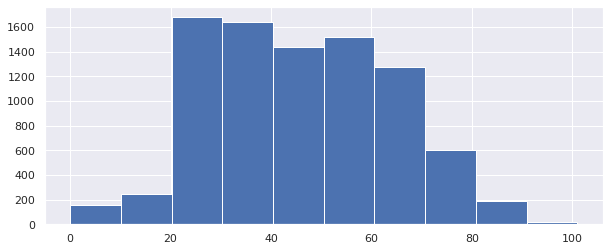

In [8]:
covid.age.hist(figsize=(10, 4))

Histograms work by grouping values into bins of equal value range. Oftentimes, it is used to see if there are underlying clues as to what the distribution type is: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. The figures above shows that both age and fare are skewed to the right.

Another way to grasp the distribution is by using density plots. Suppose we want to know the distribution for the number of parents or children onboard for each passengers.

The plot tells us that the most susceptible to contracting the virus is between the ages 20-60. This is because these group of people belong to the active part of the community - people who go to work, to commute daily - generally, people who interact with other people the most. This is also a clear indication that to lessen the spread of the virus, it is essential to have a community quarantine.

#### Density Plot

It is also possible to plot a distribution of  observations with seaborn's `distplot()` which shows a histogram overlayed with a kerenel density estimate.

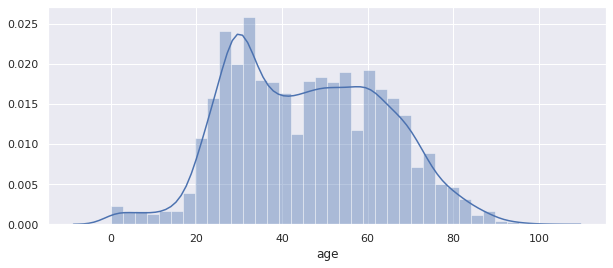

In [9]:
plt.figure(figsize=(10, 4))
sns.distplot(covid.age)

This looks a bit different from a histogram because the bars here are normalized and shows the density rather than the actual count in each bin.

### Qualitative Features

Qualitative or categorical features take on a fixed number of values like region, province status, and so on. Binary values are values like True or False, Male or Female. If the values of a categorical variable are ordered, it is called ordinal. However powerful, quantitative analysis wont help us much with our data since most of our columns are non-numeric. In this case, we can do a number of qualitative analysis on categorical features.

#### Frequency Table

A frequency table shows how frequent each value of the categorical variable occurs. For this, we can use the `value_counts()` method. To get the actual values for breakdown of each age group, we can do a `value_counts()` on a series.

In [10]:
covid.age_group.value_counts()

30 to 34    1032
25 to 29     965
45 to 49     745
50 to 54     742
60 to 64     741
55 to 59     738
35 to 39     729
40 to 44     678
65 to 69     601
20 to 24     524
70 to 74     448
80+          241
75 to 79     235
15 to 19     137
0 to 4        84
10 to 14      63
5 to 9        60
Name: age_group, dtype: int64

In [11]:
covid.region.value_counts()

Metropolitan Manila                            4910
CALABARZON (Region IV-A)                       1094
Central Visayas (Region VII)                    670
Central Luzon (Region III)                      359
Davao Region (Region XI)                        131
Western Visayas (Region VI)                      67
Ilocos Region (Region I)                         53
Bicol Region (Region V)                          43
Cordillera Administrative Region (CAR)           43
Cagayan Valley (Region II)                       33
MIMAROPA (Region IV-B)                           20
Autonomous Region of Muslim Mindanao (ARMM)      17
Eastern Visayas (Region VIII)                    14
Zamboanga Peninsula (Region IX)                  13
Northern Mindanao (Region X)                     12
SOCCSKSARGEN (Region XII)                        11
Caraga (Region XIII)                              3
Name: region, dtype: int64

By default, values are sorted from the most frequent to the least. This case, it shows us that the most number of cases are in Metropolitan Manila. This tells us a few things like there is a big discrepancy in the areas where mass testings are conducted meaning those that are in the capital are prioritized over those that are in the provinces.

#### Bar Plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use seaborn's function `countplot()`. There is another function in seaborn that is somewhat confusingly called `barplot()` and is most likely used for representation of some basic statistics of a numerical variable grouped by a categorical feature. So, to plot the region values above:

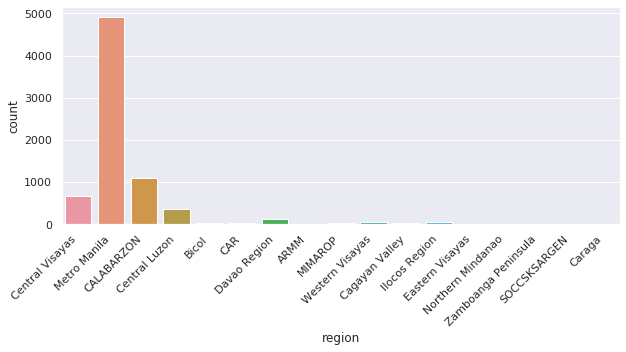

In [12]:
plt.figure(figsize=(10, 4))
region_graph = sns.countplot(x='region', data=covid)
region_graph.set_xticklabels([
    'Central Visayas',
    'Metro Manila',
    'CALABARZON',
    'Central Luzon',
    'Bicol',
    'CAR',
    'Davao Region',
    'ARMM',
    'MIMAROP',
    'Western Visayas',
    'Cagayan Valley',
    'Ilocos Region',
    'Eastern Visayas',
    'Northern Mindanao',
    'Zamboanga Peninsula',
    'SOCCSKSARGEN',
    'Caraga'
], rotation=90)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

Although histograms and bar plots look very similar, there are key differences between them:

1. Histograms are suited to show the distribution of quantitative data while bar plots are used for categorical features.
2. The values on the X-axis in the histogram are numerical while a bar plot can have any type of value: numbers, strings, or categorical features
3. Histograms X-axis is a cartesian coordinate axis along which values cannot be changed. The ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider the ordinal values like in the case for region, they are usually ordered by values.

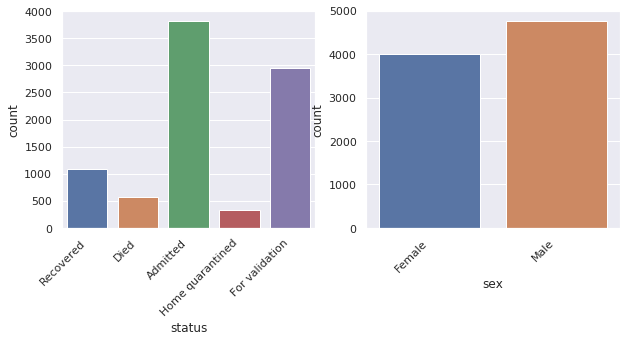

In [13]:
features = {0: 'status', 1: 'sex'}

fig, ax = plt.subplots(1, len(features.items()), figsize=(10, 4))
for key, column in features.items():
    sns.countplot(x=column, data=covid, ax=ax[key])
    ax[key].set_xticklabels(ax[key].get_xticklabels(), 
                            rotation=45, 
                            horizontalalignment='right')

plt.show()

## Multivariate Visualization

Like univariate plotting, the specific type of visualization is dependent on the type of variable being analyzed.

### Quantitative vs Quantitative

Let's look at the correlations among the numerical variables in our testing dataset. Let's first look at the DataFramme `corr()` method that calculates the correlation between each pair of features. Then we pass the resulting correlation matrix to a `heatmap()` from seaborn.

In [14]:
testing.head()

,testing_lab_name,testing_lab_name_abbrev,daily_output_positive_ind,daily_output_unique_ind_tested,daily_output_tests_conducted,unique_ind_tested,total_tests_conducted,remaining_no_of_tests,date,ind_outcome,ind_outcome_count,pct_ind_outcome
0,Baguio General Hospital and Medical Center (BG...,BGHMC,NaN,NaN,NaN,473,478,4519,2020-04-02,positive,21,0.04
1,Baguio General Hospital and Medical Center (BG...,BGHMC,NaN,NaN,NaN,473,478,4519,2020-04-02,negative,452,0.96
2,Baguio General Hospital and Medical Center (BG...,BGHMC,NaN,NaN,NaN,473,478,4519,2020-04-02,equivocal,0,0.00
3,Baguio General Hospital and Medical Center (BG...,BGHMC,NaN,NaN,NaN,473,478,4519,2020-04-02,invalid,0,0.00
4,Lung Center of the Philippines (LCP),LCP,NaN,NaN,NaN,168,168,4787,2020-04-02,positive,22,0.13


Suppose we want to get the correlation of the positive results against the total tests conducted. 

### Heatmap

In [15]:
numerical_columns = ['total_tests_conducted', 'unique_ind_tested', 'ind_outcome_count']
positive_mask = testing.ind_outcome == 'positive'

In [16]:
testing_positive = testing[positive_mask][['testing_lab_name_abbrev'] + numerical_columns]
testing_positive.head()

,testing_lab_name_abbrev,total_tests_conducted,unique_ind_tested,ind_outcome_count
0,BGHMC,478,473,21
4,LCP,168,168,22
8,RITM,20826,15197,2652
12,SLH,193,115,31
16,SPMC,927,721,67


In [17]:
testing_positive.corr()

,total_tests_conducted,unique_ind_tested,ind_outcome_count
total_tests_conducted,1.000000,0.999573,0.991203
unique_ind_tested,0.999573,1.000000,0.989542
ind_outcome_count,0.991203,0.989542,1.000000


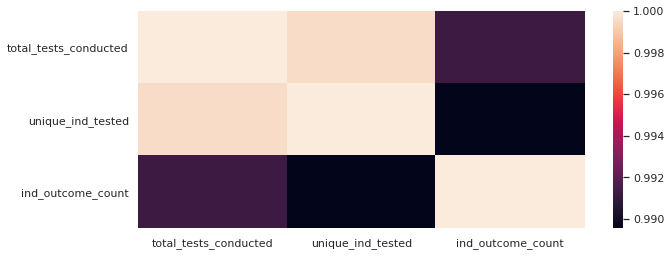

In [18]:
plt.figure(figsize=(10, 4))
sns.heatmap(testing_positive.corr())

#### Scatter Plot

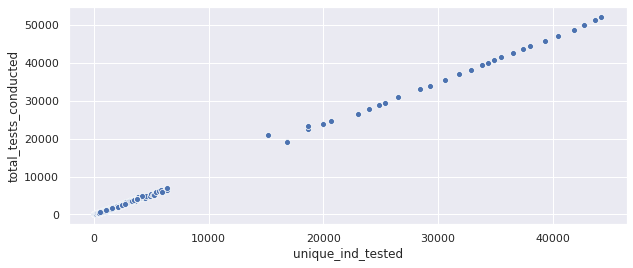

In [19]:
plt.figure(figsize=(10, 4))
sns.scatterplot(testing_positive.unique_ind_tested, testing_positive.total_tests_conducted)

The scatterplot above shows us that total number of tests is proportional with an almost one-to-one correspondence to the unique individual test counts. This maybe because of the scarcity of these test kits. Adding to that, these tests are very expensive and it would be very wasteful to do multiple tests on a person unless extremely needed.

#### Joint Plot

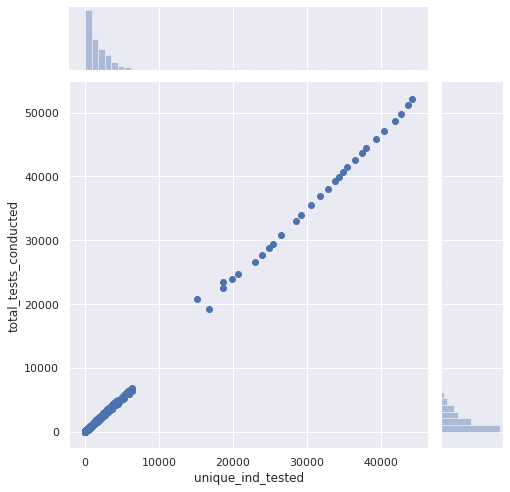

In [20]:
sns.jointplot(testing_positive.unique_ind_tested, 
              testing_positive.total_tests_conducted,
             kind='scatter',
             height=7,
             ratio=5)
plt.show()

Using `jointplot()` we can see additional plots for the histograms of each variable. We can see that the distribution is heavily skewed to the right. This means that the processing of covid tests is heavily centered around only a few testing centers.

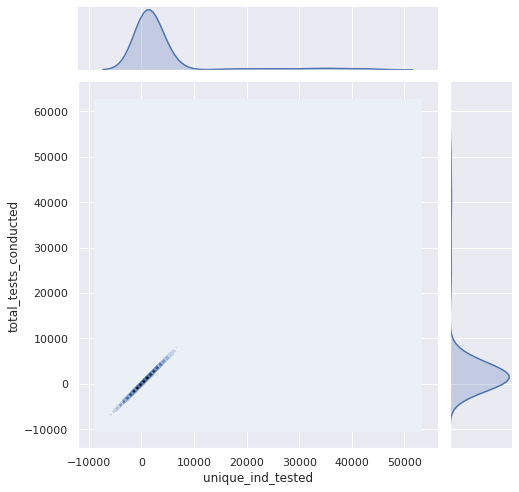

In [49]:
sns.jointplot(testing_positive.unique_ind_tested, 
              testing_positive.total_tests_conducted,
             kind='kde',
             height=7,
             ratio=5)

Using the same function, we can create a smoothed out version of our bivariate distribution

#### Pair Plot

Additionally, we can plot multiple bivariate distributions using `pairplot()`. The result is a scatterplot matrix where the diagonal contains the distributions of the corresponding variable and the scatter plots for each pair of variables fill the rest of the matrix.

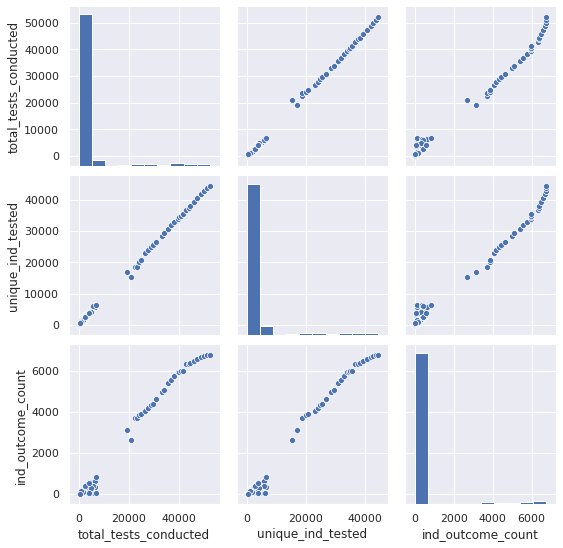

In [22]:
sns.pairplot(testing_positive)


### Quantitative vs Categorical

There are cases however when we want to compare numerical variables with categorical ones. Previously we learned about `scatter()` but we can throw in a categorical feature of interest. For this we can use `lmplot()`

####  LM Plot

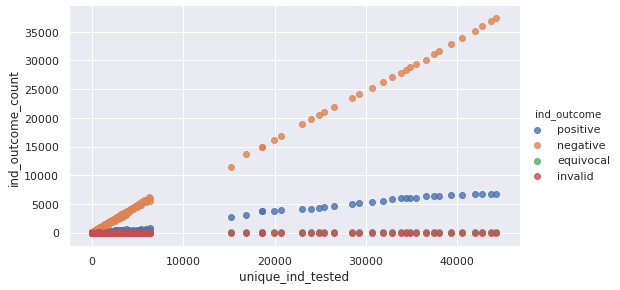

In [46]:
sns.lmplot('unique_ind_tested', 'ind_outcome_count',            
           data=testing, 
           hue='ind_outcome', 
           fit_reg=False,
           height=4.25,
           aspect=1.8)
plt.show()

Here, by adding categorical classification to our scatterplot, we can see much clearer the separation between test results. We can see that the majority of the conducted test is negative and contrast it with the positive results.

### Categorical vs Categorical

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

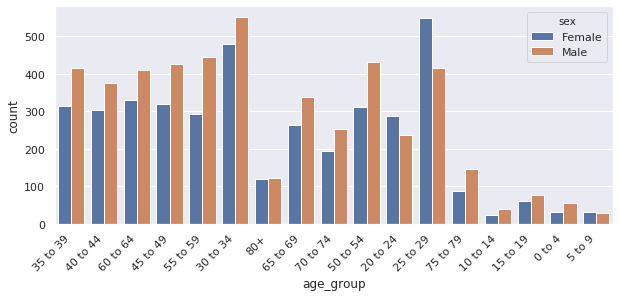

In [24]:
plt.figure(figsize=(10, 4))
sns.countplot(x='age_group', hue='sex', data=covid)
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

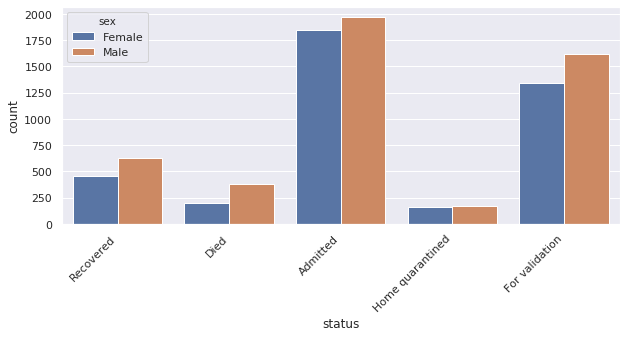

In [25]:
plt.figure(figsize=(10, 4))
sns.countplot(x='status', hue='sex', data=covid)
plt.xticks(rotation=45, horizontalalignment='right')

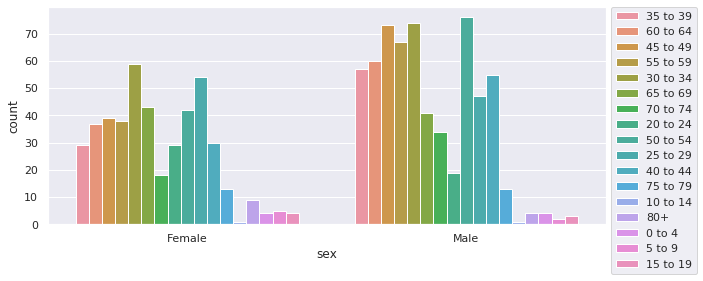

In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(x='sex', hue='age_group', data=covid[covid.status == 'Recovered'])
plt.legend(bbox_to_anchor=(1, 1.025))